After 53 times of iteration, the perceptron training terminates
Classification accuracy is: 100.0 % [[-71.5          3.53879509   3.00366739]]


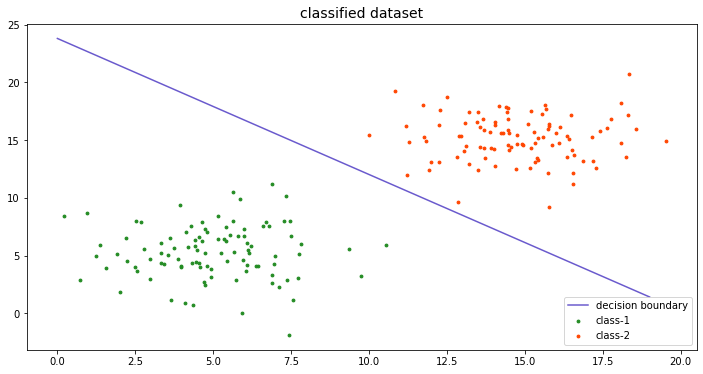

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def perceptron(train_data, num_iter):
    # split actual data and class label in the dataset
    features = train_data[:, :-1]
    labels = train_data[:, -1]
    # set weights and bias to zero 
    w = np.zeros((1, features.shape[1] + 1))
    counters = 0
    # number of iteration 
    for iteration in range(num_iter):
        counters += 1
        counter = 0
        for x, label in zip(features, labels):
            # put a 1 at the begining of each line for bias in w
            x = np.insert(x, 0, 1)
            # the activation score WTX
            activ = np.sign(np.inner(w, x))
            # if the label and activation score has different sign
            if (label * activ) <= 0:
                # perform the update rule
                w += 0.5 * (label - activ) * x
                counter += 1
        if counter == 0:
            print('After', counters, 'times of iteration, the perceptron training terminates')
            break
    return w


def test(dataset):
    w = perceptron(dataset, 1000)
    correctPredictions = 0
    features = dataset[:, :-1]
    labels = dataset[:, -1]
    for x, label in zip(features, labels):
        x = np.insert(x, 0, 1)
        activ = np.inner(w, x)
        if activ * label > 0:
            correctPredictions += 1
    accuracy = float(correctPredictions) / float(len(dataset))
    print('Classification accuracy is:', accuracy * 100, '%',w)
    return w


def class_plots(dataset, title):
    figure = plt.figure(1, figsize=(12, 6))
    plt.title(title, fontsize=14)
    plt.scatter(class1[:, 0], class1[:, 1], s=8, lw=1, c='forestgreen', label='class-1')
    plt.scatter(class2[:, 0], class2[:, 1], s=8, lw=1, c='orangered', label='class-2')
    w = test(dataset)
    x = np.linspace(int(min(dataset[:, 0])), int(max(dataset[:, 0])), 1000)
    y = (-w[0, 1] * x - w[0, 0]) / w[0, 2]
    plt.plot(x, y, color='slateblue', label='decision boundary')
    plt.legend(loc=4)
    plt.show()
# Generate dataset
np.random.seed(844)
class1 = np.random.normal(5, 2, (100, 2))
class1 = np.insert(class1, 2, values=-1, axis=1)
class2 = np.random.normal(15, 2, (100, 2))
class2 = np.insert(class2, 2, values=1, axis=1)
dataset = np.concatenate((class1, class2))

class_plots(dataset, title='classified dataset')
